In [1]:
import pandas as pd
import numpy as np
import pandas_ta as ta

In [2]:
#read data
df=pd.read_csv("/Users/luzhang/Desktop/data/QQQ.csv")
df = pd.DataFrame(df)
df

,time,open,high,low,close,volume
0,2007-04-25 15:41:00,46.2500,46.2700,46.25,46.27,199439.0
1,2007-04-25 15:42:00,46.2695,46.2695,46.25,46.26,214239.0
2,2007-04-25 15:43:00,46.2600,46.2600,46.24,46.25,243695.0
3,2007-04-25 15:44:00,46.2500,46.2600,46.24,46.25,352069.0
4,2007-04-25 15:45:00,46.2600,46.2600,46.25,46.26,10900.0
...,...,...,...,...,...,...
1704250,2018-11-01 20:59:00,171.0300,171.0300,171.03,171.03,100.0
1704251,2018-11-01 21:28:00,170.9400,170.9400,170.94,170.94,100.0
1704252,2018-11-01 21:29:00,170.9200,170.9200,170.92,170.92,200.0
1704253,2018-11-01 22:07:00,170.5000,170.5000,170.50,170.50,500.0


In [6]:
def DropOutlierday(data):
    # subset dataframe such that it only contains the complete transcation
    totalDay=pd.to_datetime(data.index.date).unique()
    completeDay=totalDay[day_keep]

    outlierday=totalDay.difference(completeDay)
    data['date'] = [d.date() for d in data.index]

    outlierday=outlierday.strftime('%Y-%m-%d')
    t=pd.DataFrame()
    
    for i in range(len(outlierday)):
        temp=pd.DataFrame(data['date'].loc[outlierday[i]])
        t=t.append(temp)
    
    data = data.drop(t.index) # drop the outlier day
    data = data.drop('date',1) # delete columne 'date'
    return data

### Retuns Calculation

In [3]:
# data pre-cessing
#change sereis to datetime format
df['time']=pd.to_datetime(df['time'])
df.set_index('time', inplace=True)

In [9]:
#subset df to calculate LH, LH0 and ROD
df_LH_ROD = df[((df.index.hour == 15) & (df.index.minute == 30))|
        ((df.index.hour == 16) & (df.index.minute == 0))]
df_LH_ROD

,open,high,low,close,volume
time,,,,,
2007-04-25 16:00:00,46.280,46.28,46.260,46.27,682148.0
2007-04-26 15:30:00,46.580,46.59,46.570,46.59,38575.0
2007-04-26 16:00:00,46.480,46.48,46.440,46.44,1051977.0
2007-04-27 15:30:00,46.480,46.49,46.480,46.49,61000.0
2007-04-27 16:00:00,46.500,46.52,46.490,46.51,870558.0
...,...,...,...,...,...
2018-10-30 16:00:00,165.935,165.99,165.750,165.86,1348669.0
2018-10-31 15:30:00,170.535,170.80,170.515,170.78,131251.0
2018-10-31 16:00:00,169.920,169.94,169.630,169.66,1318913.0


In [10]:
# find the complete transaction
rows_eachday = df_LH_ROD.groupby(df_LH_ROD.index.date).size().values
day_keep = [True if x==2 else False for x in rows_eachday]
sum(day_keep)

2878

In [11]:
df_LH_ROD = DropOutlierday(df_LH_ROD)

/var/folders/46/kfpb_pwn1kv8zw9fmn8kgbrr0000gn/T/ipykernel_63469/3023528149.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data['date'] = [d.date() for d in data.index]
/var/folders/46/kfpb_pwn1kv8zw9fmn8kgbrr0000gn/T/ipykernel_63469/3023528149.py:17: FutureWarning: In a future version of pandas all arguments of DataFrame.drop except for the argument 'labels' will be keyword-only
  data = data.drop('date',1) # delete columne 'date'


In [12]:
df_LH_ROD

,open,high,low,close,volume
time,,,,,
2007-04-26 15:30:00,46.5800,46.59,46.570,46.59,38575.0
2007-04-26 16:00:00,46.4800,46.48,46.440,46.44,1051977.0
2007-04-27 15:30:00,46.4800,46.49,46.480,46.49,61000.0
2007-04-27 16:00:00,46.5000,46.52,46.490,46.51,870558.0
2007-04-30 15:30:00,46.1019,46.12,46.100,46.11,83579.0
...,...,...,...,...,...
2018-10-30 16:00:00,165.9350,165.99,165.750,165.86,1348669.0
2018-10-31 15:30:00,170.5350,170.80,170.515,170.78,131251.0
2018-10-31 16:00:00,169.9200,169.94,169.630,169.66,1318913.0


In [13]:
df_LH_ROD['returns'] = df_LH_ROD['close'].pct_change();
df_LH_ROD

,open,high,low,close,volume,returns
time,,,,,,
2007-04-26 15:30:00,46.5800,46.59,46.570,46.59,38575.0,NaN
2007-04-26 16:00:00,46.4800,46.48,46.440,46.44,1051977.0,-0.003220
2007-04-27 15:30:00,46.4800,46.49,46.480,46.49,61000.0,0.001077
2007-04-27 16:00:00,46.5000,46.52,46.490,46.51,870558.0,0.000430
2007-04-30 15:30:00,46.1019,46.12,46.100,46.11,83579.0,-0.008600
...,...,...,...,...,...,...
2018-10-30 16:00:00,165.9350,165.99,165.750,165.86,1348669.0,0.003327
2018-10-31 15:30:00,170.5350,170.80,170.515,170.78,131251.0,0.029664
2018-10-31 16:00:00,169.9200,169.94,169.630,169.66,1318913.0,-0.006558


In [14]:
df_LH=df_LH_ROD[((df_LH_ROD.index.hour == 16) & (df_LH_ROD.index.minute == 0))]
df_LH=df_LH.drop(['open','high','low','close','volume'],1)
df_LH = df_LH.rename(columns={"returns":"R_LH"})
df_LH

/var/folders/46/kfpb_pwn1kv8zw9fmn8kgbrr0000gn/T/ipykernel_63469/3991369880.py:2: FutureWarning: In a future version of pandas all arguments of DataFrame.drop except for the argument 'labels' will be keyword-only
  df_LH=df_LH.drop(['open','high','low','close','volume'],1)


,R_LH
time,
2007-04-26 16:00:00,-0.003220
2007-04-27 16:00:00,0.000430
2007-04-30 16:00:00,-0.003253
2007-05-01 16:00:00,0.002393
2007-05-02 16:00:00,-0.000742
...,...
2018-10-26 16:00:00,0.001802
2018-10-29 16:00:00,0.009122
2018-10-30 16:00:00,0.003327


In [15]:
df_LH0=df_LH.shift()
df_LH0=df_LH0.rename(columns={'R_LH':'R_LH0'})
df_LH0

,R_LH0
time,
2007-04-26 16:00:00,NaN
2007-04-27 16:00:00,-0.003220
2007-04-30 16:00:00,0.000430
2007-05-01 16:00:00,-0.003253
2007-05-02 16:00:00,0.002393
...,...
2018-10-26 16:00:00,-0.004774
2018-10-29 16:00:00,0.001802
2018-10-30 16:00:00,0.009122


In [16]:
df_ROD=df_LH_ROD[((df_LH_ROD.index.hour == 15) & (df_LH_ROD.index.minute == 30))]
df_ROD=df_ROD.drop(['open','high','low','close','volume'],1)
df_ROD=df_ROD.rename(columns={'returns':'R_ROD'})
df_ROD

/var/folders/46/kfpb_pwn1kv8zw9fmn8kgbrr0000gn/T/ipykernel_63469/2940247541.py:2: FutureWarning: In a future version of pandas all arguments of DataFrame.drop except for the argument 'labels' will be keyword-only
  df_ROD=df_ROD.drop(['open','high','low','close','volume'],1)


,R_ROD
time,
2007-04-26 15:30:00,NaN
2007-04-27 15:30:00,0.001077
2007-04-30 15:30:00,-0.008600
2007-05-01 15:30:00,0.000000
2007-05-02 15:30:00,0.009106
...,...
2018-10-26 15:30:00,-0.026146
2018-10-29 15:30:00,-0.027280
2018-10-30 15:30:00,0.009712


In [17]:
df_ON=df[((df.index.hour == 9) & (df.index.minute == 31))|
        ((df.index.hour == 16) & (df.index.minute == 0))]
# Larry: 9:31 is the data for the first minute which is better than using the data for 9:29~9:30
df_ON

,open,high,low,close,volume
time,,,,,
2007-04-25 16:00:00,46.280,46.28,46.26,46.27,682148.0
2007-04-26 09:31:00,46.420,46.45,46.41,46.44,1192967.0
2007-04-26 16:00:00,46.480,46.48,46.44,46.44,1051977.0
2007-04-27 09:31:00,46.370,46.40,46.37,46.38,636731.0
2007-04-27 16:00:00,46.500,46.52,46.49,46.51,870558.0
...,...,...,...,...,...
2018-10-30 16:00:00,165.935,165.99,165.75,165.86,1348669.0
2018-10-31 09:31:00,168.540,168.84,168.54,168.72,668522.0
2018-10-31 16:00:00,169.920,169.94,169.63,169.66,1318913.0


In [18]:
rows_eachday = df_ON.groupby(df_ON.index.date).size().values
day_keep = [True if x==2 else False for x in rows_eachday]
sum(day_keep)

2881

In [19]:
df_ON = DropOutlierday(df_ON)

/var/folders/46/kfpb_pwn1kv8zw9fmn8kgbrr0000gn/T/ipykernel_63469/3023528149.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data['date'] = [d.date() for d in data.index]
/var/folders/46/kfpb_pwn1kv8zw9fmn8kgbrr0000gn/T/ipykernel_63469/3023528149.py:17: FutureWarning: In a future version of pandas all arguments of DataFrame.drop except for the argument 'labels' will be keyword-only
  data = data.drop('date',1) # delete columne 'date'


In [20]:
df_ON

,open,high,low,close,volume
time,,,,,
2007-04-26 09:31:00,46.420,46.45,46.41,46.44,1192967.0
2007-04-26 16:00:00,46.480,46.48,46.44,46.44,1051977.0
2007-04-27 09:31:00,46.370,46.40,46.37,46.38,636731.0
2007-04-27 16:00:00,46.500,46.52,46.49,46.51,870558.0
2007-04-30 09:31:00,46.500,46.51,46.44,46.44,521267.0
...,...,...,...,...,...
2018-10-30 16:00:00,165.935,165.99,165.75,165.86,1348669.0
2018-10-31 09:31:00,168.540,168.84,168.54,168.72,668522.0
2018-10-31 16:00:00,169.920,169.94,169.63,169.66,1318913.0


In [21]:
df_ON['close_pre'] = df_ON['close'].shift()

In [22]:
df_ON = df_ON[((df_ON.index.hour == 9) & (df_ON.index.minute == 31))]

In [23]:
df_ON

,open,high,low,close,volume,close_pre
time,,,,,,
2007-04-26 09:31:00,46.42,46.45,46.410,46.44,1192967.0,NaN
2007-04-27 09:31:00,46.37,46.40,46.370,46.38,636731.0,46.44
2007-04-30 09:31:00,46.50,46.51,46.440,46.44,521267.0,46.51
2007-05-01 09:31:00,45.97,46.02,45.960,46.02,726559.0,45.96
2007-05-02 09:31:00,46.09,46.10,46.050,46.07,1239876.0,46.07
...,...,...,...,...,...,...
2018-10-26 09:31:00,165.25,166.15,165.200,166.06,1309434.0,170.96
2018-10-29 09:31:00,169.16,169.54,169.130,169.45,817472.0,166.79
2018-10-30 09:31:00,162.83,162.83,162.015,162.26,763153.0,163.72


In [24]:
df_ON['R_ON'] = df_ON['open']/df_ON['close_pre']-1;
df_ON = df_ON.drop(["open","high","low","close","volume","close_pre"],1)
df_ON

/var/folders/46/kfpb_pwn1kv8zw9fmn8kgbrr0000gn/T/ipykernel_63469/2589525367.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_ON['R_ON'] = df_ON['open']/df_ON['close_pre']-1;
/var/folders/46/kfpb_pwn1kv8zw9fmn8kgbrr0000gn/T/ipykernel_63469/2589525367.py:2: FutureWarning: In a future version of pandas all arguments of DataFrame.drop except for the argument 'labels' will be keyword-only
  df_ON = df_ON.drop(["open","high","low","close","volume","close_pre"],1)


,R_ON
time,
2007-04-26 09:31:00,NaN
2007-04-27 09:31:00,-0.001507
2007-04-30 09:31:00,-0.000215
2007-05-01 09:31:00,0.000218
2007-05-02 09:31:00,0.000434
...,...
2018-10-26 09:31:00,-0.033400
2018-10-29 09:31:00,0.014209
2018-10-30 09:31:00,-0.005436


In [25]:
df_FH = df[((df.index.hour == 9) & (df.index.minute == 31))|
        ((df.index.hour == 10) & (df.index.minute == 0))]
# Larry: use 9:31 data
df_FH

,open,high,low,close,volume
time,,,,,
2007-04-26 09:31:00,46.4200,46.45,46.41,46.44,1192967.0
2007-04-26 10:00:00,46.3600,46.37,46.35,46.35,783718.0
2007-04-27 09:31:00,46.3700,46.40,46.37,46.38,636731.0
2007-04-27 10:00:00,46.4305,46.46,46.43,46.45,83858.0
2007-04-30 09:31:00,46.5000,46.51,46.44,46.44,521267.0
...,...,...,...,...,...
2018-10-30 10:00:00,165.4700,165.50,165.10,165.13,545304.0
2018-10-31 09:31:00,168.5400,168.84,168.54,168.72,668522.0
2018-10-31 10:00:00,169.8850,169.95,169.81,169.87,178197.0


In [26]:
rows_eachday = df_FH.groupby(df_FH.index.date).size().values
day_keep = [True if x==2 else False for x in rows_eachday]
sum(day_keep)

2901

In [27]:
df_FH = DropOutlierday(df_FH)

/var/folders/46/kfpb_pwn1kv8zw9fmn8kgbrr0000gn/T/ipykernel_63469/3023528149.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data['date'] = [d.date() for d in data.index]
/var/folders/46/kfpb_pwn1kv8zw9fmn8kgbrr0000gn/T/ipykernel_63469/3023528149.py:17: FutureWarning: In a future version of pandas all arguments of DataFrame.drop except for the argument 'labels' will be keyword-only
  data = data.drop('date',1) # delete columne 'date'


In [28]:
df_FH

,open,high,low,close,volume
time,,,,,
2007-04-26 09:31:00,46.4200,46.45,46.41,46.44,1192967.0
2007-04-26 10:00:00,46.3600,46.37,46.35,46.35,783718.0
2007-04-27 09:31:00,46.3700,46.40,46.37,46.38,636731.0
2007-04-27 10:00:00,46.4305,46.46,46.43,46.45,83858.0
2007-04-30 09:31:00,46.5000,46.51,46.44,46.44,521267.0
...,...,...,...,...,...
2018-10-30 10:00:00,165.4700,165.50,165.10,165.13,545304.0
2018-10-31 09:31:00,168.5400,168.84,168.54,168.72,668522.0
2018-10-31 10:00:00,169.8850,169.95,169.81,169.87,178197.0


In [29]:
df_FH['open_pre30']=df_FH['open'].shift()

In [30]:
df_FH=df_FH[(df_FH.index.hour==10)&(df_FH.index.minute==0)]
df_FH

,open,high,low,close,volume,open_pre30
time,,,,,,
2007-04-26 10:00:00,46.3600,46.37,46.35,46.35,783718.0,46.42
2007-04-27 10:00:00,46.4305,46.46,46.43,46.45,83858.0,46.37
2007-04-30 10:00:00,46.3400,46.36,46.34,46.35,164970.0,46.50
2007-05-01 10:00:00,45.8900,45.94,45.88,45.93,777447.0,45.97
2007-05-02 10:00:00,46.2000,46.20,46.19,46.20,130781.0,46.09
...,...,...,...,...,...,...
2018-10-26 10:00:00,167.2800,167.29,166.94,167.00,177891.0,165.25
2018-10-29 10:00:00,168.8900,169.03,168.81,168.93,101751.0,169.16
2018-10-30 10:00:00,165.4700,165.50,165.10,165.13,545304.0,162.83


In [31]:
df_FH['R_FH'] = df_FH['open']/df_FH['open_pre30']-1
df_FH = df_FH.drop(["open","high","low","close","open_pre30",'volume'],1)

/var/folders/46/kfpb_pwn1kv8zw9fmn8kgbrr0000gn/T/ipykernel_63469/1210239203.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_FH['R_FH'] = df_FH['open']/df_FH['open_pre30']-1
/var/folders/46/kfpb_pwn1kv8zw9fmn8kgbrr0000gn/T/ipykernel_63469/1210239203.py:2: FutureWarning: In a future version of pandas all arguments of DataFrame.drop except for the argument 'labels' will be keyword-only
  df_FH = df_FH.drop(["open","high","low","close","open_pre30",'volume'],1)


In [32]:
df_FH

,R_FH
time,
2007-04-26 10:00:00,-0.001293
2007-04-27 10:00:00,0.001305
2007-04-30 10:00:00,-0.003441
2007-05-01 10:00:00,-0.001740
2007-05-02 10:00:00,0.002387
...,...
2018-10-26 10:00:00,0.012284
2018-10-29 10:00:00,-0.001596
2018-10-30 10:00:00,0.016213


In [33]:
df_ONFH = df[((df.index.hour==16)&(df.index.minute==0))|
            ((df.index.hour==10)&(df.index.minute==0))]
df_ONFH

,open,high,low,close,volume
time,,,,,
2007-04-25 16:00:00,46.2800,46.28,46.26,46.27,682148.0
2007-04-26 10:00:00,46.3600,46.37,46.35,46.35,783718.0
2007-04-26 16:00:00,46.4800,46.48,46.44,46.44,1051977.0
2007-04-27 10:00:00,46.4305,46.46,46.43,46.45,83858.0
2007-04-27 16:00:00,46.5000,46.52,46.49,46.51,870558.0
...,...,...,...,...,...
2018-10-30 16:00:00,165.9350,165.99,165.75,165.86,1348669.0
2018-10-31 10:00:00,169.8850,169.95,169.81,169.87,178197.0
2018-10-31 16:00:00,169.9200,169.94,169.63,169.66,1318913.0


In [34]:
rows_eachday = df_ONFH.groupby(df_ONFH.index.date).size().values
day_keep = [True if x==2 else False for x in rows_eachday]
sum(day_keep)

2882

In [35]:
df_ONFH = DropOutlierday(df_ONFH)

/var/folders/46/kfpb_pwn1kv8zw9fmn8kgbrr0000gn/T/ipykernel_63469/3023528149.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data['date'] = [d.date() for d in data.index]
/var/folders/46/kfpb_pwn1kv8zw9fmn8kgbrr0000gn/T/ipykernel_63469/3023528149.py:17: FutureWarning: In a future version of pandas all arguments of DataFrame.drop except for the argument 'labels' will be keyword-only
  data = data.drop('date',1) # delete columne 'date'


In [36]:
df_ONFH

,open,high,low,close,volume
time,,,,,
2007-04-26 10:00:00,46.3600,46.37,46.35,46.35,783718.0
2007-04-26 16:00:00,46.4800,46.48,46.44,46.44,1051977.0
2007-04-27 10:00:00,46.4305,46.46,46.43,46.45,83858.0
2007-04-27 16:00:00,46.5000,46.52,46.49,46.51,870558.0
2007-04-30 10:00:00,46.3400,46.36,46.34,46.35,164970.0
...,...,...,...,...,...
2018-10-30 16:00:00,165.9350,165.99,165.75,165.86,1348669.0
2018-10-31 10:00:00,169.8850,169.95,169.81,169.87,178197.0
2018-10-31 16:00:00,169.9200,169.94,169.63,169.66,1318913.0


In [37]:
df_ONFH['close_preday']=df_ONFH['close'].shift()

In [38]:
df_ONFH=df_ONFH[((df_ONFH.index.hour==10)&(df_ONFH.index.minute==0))]

In [39]:
df_ONFH['R_ONFH']=df_ONFH['open']/df_ONFH['close_preday']-1

/var/folders/46/kfpb_pwn1kv8zw9fmn8kgbrr0000gn/T/ipykernel_63469/1058864201.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_ONFH['R_ONFH']=df_ONFH['open']/df_ONFH['close_preday']-1


In [40]:
df_ONFH = df_ONFH.drop(['open','high','low','close','volume','close_preday'],1)

/var/folders/46/kfpb_pwn1kv8zw9fmn8kgbrr0000gn/T/ipykernel_63469/2488401400.py:1: FutureWarning: In a future version of pandas all arguments of DataFrame.drop except for the argument 'labels' will be keyword-only
  df_ONFH = df_ONFH.drop(['open','high','low','close','volume','close_preday'],1)


In [41]:
df_ONFH

,R_ONFH
time,
2007-04-26 10:00:00,NaN
2007-04-27 10:00:00,-0.000205
2007-04-30 10:00:00,-0.003655
2007-05-01 10:00:00,-0.001523
2007-05-02 10:00:00,0.002822
...,...
2018-10-26 10:00:00,-0.021526
2018-10-29 10:00:00,0.012591
2018-10-30 10:00:00,0.010689


In [42]:
df_M = df[((df.index.hour==10)&(df.index.minute==0)) |
         ((df.index.hour==15)&(df.index.minute==0))]
df_M

,open,high,low,close,volume
time,,,,,
2007-04-26 10:00:00,46.3600,46.37,46.3500,46.3500,783718.0
2007-04-26 15:00:00,46.5700,46.58,46.5600,46.5725,45830.0
2007-04-27 10:00:00,46.4305,46.46,46.4300,46.4500,83858.0
2007-04-27 15:00:00,46.5200,46.53,46.5100,46.5200,110398.0
2007-04-30 10:00:00,46.3400,46.36,46.3400,46.3500,164970.0
...,...,...,...,...,...
2018-10-30 15:00:00,164.9200,164.98,164.7400,164.8000,138591.0
2018-10-31 10:00:00,169.8850,169.95,169.8100,169.8700,178197.0
2018-10-31 15:00:00,170.7400,170.83,170.7301,170.8200,74184.0


In [43]:
rows_eachday = df_M.groupby(df_M.index.date).size().values
day_keep = [True if x==2 else False for x in rows_eachday]
sum(day_keep)

2882

In [44]:
df_M = DropOutlierday(df_M)

/var/folders/46/kfpb_pwn1kv8zw9fmn8kgbrr0000gn/T/ipykernel_63469/3023528149.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data['date'] = [d.date() for d in data.index]
/var/folders/46/kfpb_pwn1kv8zw9fmn8kgbrr0000gn/T/ipykernel_63469/3023528149.py:17: FutureWarning: In a future version of pandas all arguments of DataFrame.drop except for the argument 'labels' will be keyword-only
  data = data.drop('date',1) # delete columne 'date'


In [45]:
df_M

,open,high,low,close,volume
time,,,,,
2007-04-26 10:00:00,46.3600,46.37,46.3500,46.3500,783718.0
2007-04-26 15:00:00,46.5700,46.58,46.5600,46.5725,45830.0
2007-04-27 10:00:00,46.4305,46.46,46.4300,46.4500,83858.0
2007-04-27 15:00:00,46.5200,46.53,46.5100,46.5200,110398.0
2007-04-30 10:00:00,46.3400,46.36,46.3400,46.3500,164970.0
...,...,...,...,...,...
2018-10-30 15:00:00,164.9200,164.98,164.7400,164.8000,138591.0
2018-10-31 10:00:00,169.8850,169.95,169.8100,169.8700,178197.0
2018-10-31 15:00:00,170.7400,170.83,170.7301,170.8200,74184.0


In [46]:
df_M['open_past30'] = df_M['open'].shift()

In [47]:
df_M = df_M[((df_M.index.hour==15)&(df_M.index.minute==0))]

In [48]:
df_M['R_M'] = df_M['close']/df_M['open_past30']-1

/var/folders/46/kfpb_pwn1kv8zw9fmn8kgbrr0000gn/T/ipykernel_63469/1719777920.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_M['R_M'] = df_M['close']/df_M['open_past30']-1


In [49]:
df_M = df_M.drop(['open','high','low','close','open_past30','volume'],1)

/var/folders/46/kfpb_pwn1kv8zw9fmn8kgbrr0000gn/T/ipykernel_63469/2592150204.py:1: FutureWarning: In a future version of pandas all arguments of DataFrame.drop except for the argument 'labels' will be keyword-only
  df_M = df_M.drop(['open','high','low','close','open_past30','volume'],1)


In [50]:
df_M

,R_M
time,
2007-04-26 15:00:00,0.004584
2007-04-27 15:00:00,0.001928
2007-04-30 15:00:00,-0.004100
2007-05-01 15:00:00,0.003487
2007-05-02 15:00:00,0.007143
...,...
2018-10-26 15:00:00,-0.006815
2018-10-29 15:00:00,-0.029279
2018-10-30 15:00:00,-0.004049


In [51]:
df_SLH = df[((df.index.hour==15)&(df.index.minute==30)) |
           ((df.index.hour==15)&(df.index.minute==0))]
df_SLH

,open,high,low,close,volume
time,,,,,
2007-04-26 15:00:00,46.5700,46.58,46.5600,46.5725,45830.0
2007-04-26 15:30:00,46.5800,46.59,46.5700,46.5900,38575.0
2007-04-27 15:00:00,46.5200,46.53,46.5100,46.5200,110398.0
2007-04-27 15:30:00,46.4800,46.49,46.4800,46.4900,61000.0
2007-04-30 15:00:00,46.1400,46.16,46.1300,46.1500,139213.0
...,...,...,...,...,...
2018-10-30 15:30:00,165.4434,165.50,165.2400,165.3100,153005.0
2018-10-31 15:00:00,170.7400,170.83,170.7301,170.8200,74184.0
2018-10-31 15:30:00,170.5350,170.80,170.5150,170.7800,131251.0


In [52]:
rows_eachday = df_SLH.groupby(df_SLH.index.date).size().values
day_keep = [True if x==2 else False for x in rows_eachday]
sum(day_keep)

2877

In [53]:
df_SLH = DropOutlierday(df_SLH)

/var/folders/46/kfpb_pwn1kv8zw9fmn8kgbrr0000gn/T/ipykernel_63469/3023528149.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data['date'] = [d.date() for d in data.index]
/var/folders/46/kfpb_pwn1kv8zw9fmn8kgbrr0000gn/T/ipykernel_63469/3023528149.py:17: FutureWarning: In a future version of pandas all arguments of DataFrame.drop except for the argument 'labels' will be keyword-only
  data = data.drop('date',1) # delete columne 'date'


In [54]:
df_SLH['close_pre60'] = df_SLH['close'].shift()

In [55]:
df_SLH = df_SLH[((df_SLH.index.hour==15)&(df_SLH.index.minute==30))]

In [56]:
df_SLH['R_SLH'] = df_SLH['close']/df_SLH['close_pre60']-1

In [57]:
df_SLH = df_SLH.drop(['open','high','low','close','volume','close_pre60'],1)

/var/folders/46/kfpb_pwn1kv8zw9fmn8kgbrr0000gn/T/ipykernel_63469/269419993.py:1: FutureWarning: In a future version of pandas all arguments of DataFrame.drop except for the argument 'labels' will be keyword-only
  df_SLH = df_SLH.drop(['open','high','low','close','volume','close_pre60'],1)


In [58]:
df_SLH

,R_SLH
time,
2007-04-26 15:30:00,0.000376
2007-04-27 15:30:00,-0.000645
2007-04-30 15:30:00,-0.000867
2007-05-01 15:30:00,-0.001954
2007-05-02 15:30:00,-0.000870
...,...
2018-10-26 15:30:00,0.002107
2018-10-29 15:30:00,-0.010400
2018-10-30 15:30:00,0.003095


In [59]:
# keep the date and ignore the time
df_LH['new_date'] = [d.date() for d in df_LH.index]
df_LH0['new_date'] = [d.date() for d in df_LH0.index]
df_ROD['new_date'] = [d.date() for d in df_ROD.index]
df_ON['new_date'] = [d.date() for d in df_ON.index]
df_FH['new_date'] = [d.date() for d in df_FH.index]
df_ONFH['new_date'] = [d.date() for d in df_ONFH.index]
df_M['new_date'] = [d.date() for d in df_M.index]
df_SLH['new_date'] = [d.date() for d in df_SLH.index]

In [60]:
# merge by same date
data_frames=[df_LH, df_LH0, df_ROD, df_ON, df_FH, df_ONFH, df_M, df_SLH]

In [61]:
from functools import reduce

In [62]:
df_merged = reduce(lambda  left,right: pd.merge(left,right,on=['new_date'],
                                            how='inner'), data_frames)

In [63]:
df_merged

,R_LH,new_date,R_LH0,R_ROD,R_ON,R_FH,R_ONFH,R_M,R_SLH
0,-0.003220,2007-04-26,NaN,NaN,NaN,-0.001293,NaN,0.004584,0.000376
1,0.000430,2007-04-27,-0.003220,0.001077,-0.001507,0.001305,-0.000205,0.001928,-0.000645
2,-0.003253,2007-04-30,0.000430,-0.008600,-0.000215,-0.003441,-0.003655,-0.004100,-0.000867
3,0.002393,2007-05-01,-0.003253,0.000000,0.000218,-0.001740,-0.001523,0.003487,-0.001954
4,-0.000742,2007-05-02,0.002393,0.009106,0.000434,0.002387,0.002822,0.007143,-0.000870
...,...,...,...,...,...,...,...,...,...
2870,0.001802,2018-10-26,-0.004774,-0.026146,-0.033400,0.012284,-0.021526,-0.006815,0.002107
2871,0.009122,2018-10-29,0.001802,-0.027280,0.014209,-0.001596,0.012591,-0.029279,-0.010400
2872,0.003327,2018-10-30,0.009122,0.009712,-0.005436,0.016213,0.010689,-0.004049,0.003095
2873,-0.006558,2018-10-31,0.003327,0.029664,0.016158,0.007980,0.024267,0.005504,-0.000234


In [64]:
df_merged=df_merged.rename(columns={'new_date':'datetime'})

In [65]:
df_merged = df_merged.dropna()

In [66]:
df_merged=df_merged.set_index('datetime')

In [67]:
df_merged

,R_LH,R_LH0,R_ROD,R_ON,R_FH,R_ONFH,R_M,R_SLH
datetime,,,,,,,,
2007-04-27,0.000430,-0.003220,0.001077,-0.001507,0.001305,-0.000205,0.001928,-0.000645
2007-04-30,-0.003253,0.000430,-0.008600,-0.000215,-0.003441,-0.003655,-0.004100,-0.000867
2007-05-01,0.002393,-0.003253,0.000000,0.000218,-0.001740,-0.001523,0.003487,-0.001954
2007-05-02,-0.000742,0.002393,0.009106,0.000434,0.002387,0.002822,0.007143,-0.000870
2007-05-03,-0.000440,-0.000742,0.003563,0.001614,-0.000645,0.000969,0.002796,-0.000204
...,...,...,...,...,...,...,...,...
2018-10-26,0.001802,-0.004774,-0.026146,-0.033400,0.012284,-0.021526,-0.006815,0.002107
2018-10-29,0.009122,0.001802,-0.027280,0.014209,-0.001596,0.012591,-0.029279,-0.010400
2018-10-30,0.003327,0.009122,0.009712,-0.005436,0.016213,0.010689,-0.004049,0.003095


In [86]:
df_merged.to_csv("../DATA/QQQ_Returns.csv", index=True)

In [68]:
df_merged.to_csv("/Users/luzhang/Documents/GitHub/WrappingUp_Exploring_Intraday_Momentum/Data/QQQ_Returns.csv", index=True)

### Visualization

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [10]:
uscoreReturns = pd.read_csv("/Users/luzhang/Documents/GitHub/WrappingUp_Exploring_Intraday_Momentum/Data/QQQ_uscoreReturns.csv")
uscoreReturns = uscoreReturns.drop(uscoreReturns.columns[0],axis=1)
uscoreReturns

,R_LH,R_LH0,R_ROD,R_ON,R_FH,R_ONFH,R_M,R_SLH
0,0.579506,0.098643,0.503653,0.319937,0.639005,0.447286,0.602818,0.326200
1,0.096555,0.579158,0.159882,0.420494,0.151183,0.231559,0.228079,0.286186
2,0.870390,0.096207,0.450418,0.460508,0.284795,0.344990,0.710682,0.151879
3,0.335247,0.870390,0.820981,0.481037,0.755567,0.657446,0.861691,0.284795
4,0.392658,0.334899,0.631698,0.588553,0.404489,0.530097,0.670668,0.428845
...,...,...,...,...,...,...,...,...
2869,0.815066,0.054454,0.026618,0.002262,0.989040,0.009569,0.155010,0.868650
2870,0.984168,0.814718,0.021051,0.972338,0.302540,0.953201,0.006089,0.006437
2871,0.917015,0.984168,0.838031,0.137613,0.996695,0.929889,0.230167,0.927105
2872,0.030793,0.917015,0.986952,0.984168,0.969903,0.994259,0.801148,0.420494


In [14]:
from scipy.stats import norm
nscoreReturns = norm.ppf(uscoreReturns) # normalized the u-scored returns
nscoreReturns = pd.DataFrame(nscoreReturns, columns = uscoreReturns.columns)
nscoreReturns = pd.DataFrame(nscoreReturns)
nscoreReturns

,R_LH,R_LH0,R_ROD,R_ON,R_FH,R_ONFH,R_M,R_SLH
0,0.200630,-1.289322,0.009158,-0.467874,0.355800,-0.132521,0.260649,-0.450429
1,-1.301432,0.199740,-0.994944,-0.200630,-1.031373,-0.733723,-0.745187,-0.564560
2,1.128235,-1.303469,-0.124607,-0.099154,-0.568656,-0.398883,0.555378,-1.028408
3,-0.425470,1.128235,0.919111,-0.047551,0.692114,0.405503,1.087948,-0.568656
4,-0.272397,-0.426425,0.336354,0.223823,-0.241746,0.075515,0.441759,-0.179316
...,...,...,...,...,...,...,...,...
2869,0.896721,-1.603123,-1.933002,-2.839155,2.291740,-2.342850,-1.015178,1.120032
2870,2.148637,0.895418,-2.032514,1.916326,-0.517109,1.676717,-2.506940,-2.487235
2871,1.385267,2.148637,0.986396,-1.091106,2.715830,1.474962,-0.738297,1.454565
2872,-1.869260,1.385267,2.224780,2.148637,1.879364,2.527669,0.845730,-0.200630


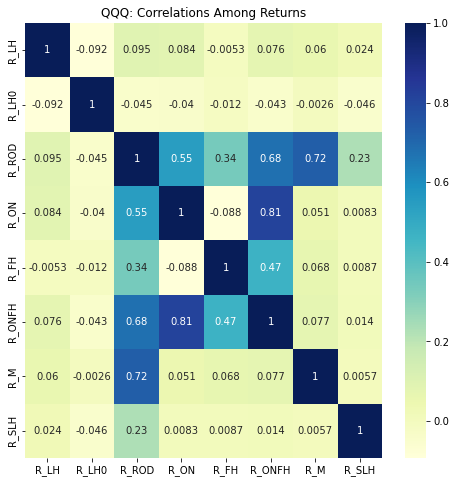

In [20]:
plt.figure(figsize=(8,8))
plt.title("QQQ: Correlations Among Returns")
sns.heatmap(nscoreReturns.corr(),cmap='YlGnBu',annot=True)
plt.savefig('QQQ_return_correlations.png')
plt.show()

In [16]:
#nscoreReturns.to_csv("/Users/luzhang/Documents/GitHub/WrappingUp_Exploring_Intraday_Momentum/Data/QQQ_nscoreReturns.csv", index=True)

### Linear regression to find the significant returns for R_LH

In [2]:
import pandas as pd
import numpy as np
import statsmodels.api as sm

In [14]:
returns = pd.read_csv("/Users/luzhang/Documents/GitHub/WrappingUp_Exploring_Intraday_Momentum/Data/QQQ_nscoreReturns.csv")

In [15]:
returns.head()

,R_LH,R_LH0,R_ROD,R_ON,R_FH,R_ONFH,R_M,R_SLH
0,0.200630,-1.289322,0.009158,-0.467874,0.355800,-0.132521,0.260649,-0.450429
1,-1.301432,0.199740,-0.994944,-0.200630,-1.031373,-0.733723,-0.745187,-0.564560
2,1.128235,-1.303469,-0.124607,-0.099154,-0.568656,-0.398883,0.555378,-1.028408
3,-0.425470,1.128235,0.919111,-0.047551,0.692114,0.405503,1.087948,-0.568656
4,-0.272397,-0.426425,0.336354,0.223823,-0.241746,0.075515,0.441759,-0.179316


In [16]:
y=returns.R_LH
X=returns[returns.columns[1:8]]

In [17]:
lr_full = sm.OLS(y, X).fit()

In [18]:
lr_full.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                                 OLS Regression Results                                
=======================================================================================
Dep. Variable:                   R_LH   R-squared (uncentered):                   0.020
Model:                            OLS   Adj. R-squared (uncentered):              0.017
Method:                 Least Squares   F-statistic:                              8.173
Date:                Fri, 01 Apr 2022   Prob (F-statistic):                    6.87e-10
Time:                        09:42:35   Log-Likelihood:                         -4049.0
No. Observations:                2874   AIC:                                      8112.
Df Residuals:                    2867   BIC:                                      8154.
Df Model:                           7                                                  
Covariance Type:            nonrobust                                                  
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
R_LH0         -0.0880      0.019     -4.745      0.000      -0.124      -0.052
R_ROD          0.0320      0.094      0.340      0.734      -0.152       0.216
R_ON          -0.0565      0.080     -0.703      0.482      -0.214       0.101
R_FH          -0.0881      0.053     -1.668      0.095      -0.192       0.015
R_ONFH         0.1355      0.108      1.252      0.211      -0.077       0.348
R_M            0.0347      0.066      0.523      0.601      -0.095       0.164
R_SLH          0.0118      0.028      0.429      0.668      -0.042       0.066
==============================================================================
Omnibus:                        0.264   Durbin-Watson:                   1.996
Prob(Omnibus):                  0.876   Jarque-Bera (JB):                0.319
Skew:                           0.004   Prob(JB):                        0.853
Kurtosis:                       2.949   Cond. No.                         13.2
==============================================================================

Notes:
[1] R² is computed without centering (uncentered) since the model does not contain a constant.
[2] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""